## Bak, Tang, Wiesenfeld (BTW) Sandpile Model

**Author:** [Erika Fille Legara](http://www.erikalegara.net)

Copyright © 2016 Erika Fille Legara

*See the file LICENSE (The MIT License) in the repository for copying permission.*

---

### Description

In this notebook, we implement the sandpile model proposed by Bak, Tang, and Wiesenfeld [1]. The sandpile model is one of the earliest models to demonstrate [self-orgnanized criticality](https://en.wikipedia.org/wiki/Self-organized_criticality) --- a mechanism present in complex systems, "a property of dynamical systems to organize its microscopic behavior to be spatial (and/or temporal) scale independent." A system is said to display SOC behaviour if it can approach *criticality* ("tipping point") without any additional external perturbations. This phenomenon is different from what is demonstrated in most systems where external parameters need to be "tweaked" to drive them to criticality; for example, heat must be added to ice for it to make a phase transition to water. In essence, a self-organising system's internal mechanism (like mere grain-grain interaction in a sandpile) is what drives it to criticality.

<blockquote>
The key result of BTW's 1987 paper was its discovery of a mechanism by which the emergence of complexity from simple local interactions could be spontaneous — and therefore plausible as a source of natural complexity — rather than something that was only possible in the lab (or lab computer) where it was possible to tune control parameters to precise values. ([source](https://en.wikipedia.org/wiki/Self-organized_criticality#Overview))
</blockquote>

We follow closely Per Bak's description of the model in his book titled "How Nature Works" [2]. As stated in the book (pp. 52), in the sandpile model, "the table where the sand is dropped is represented by a two-dimensional grid". In this recipe, we define the grid as $\textbf{M}$, which is an $N \times N$ matrix. Each cell of $\textbf{M}$, which is represented by the coordinates $x$ and $y$, has a value $Z(x,y)$ that ranges from (0,3). This is how we initialize our matrix $\textbf{M}$ below. 

After the initialization, the simulation begins by dropping a grain of sand on the sandpile at some random location $x$ and $y$ such that when a grain is dropped on $\textbf{M}(x,y)$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) + 1
\end{equation}

This process is repeated $i$ times, which we define in this recipe as `iterations`. In the model, BTW set a critical cell value $Z_{\text{cr}}=3$ such that when that value is reached, the next time a grain is added on a critical cell ($Z(x,y)=3$), 4 grain units from that cell would spill (or topple) over to the neighboring cells. That is, when $Z(x,y) > 3$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) - 4
\end{equation}

and

\begin{equation}
Z(x \pm 1,y) \rightarrow Z(x \pm 1,y) +1, \,\,Z(x ,y\pm 1) \rightarrow Z(x ,y\pm 1) +1.
\end{equation}

In their model, when the toppling happens at the boundaries, grains of sand will just leave the system. This is implemented in the model by defining a boolean variable we call `withinBounds`. 

**References:**
1. P. Bak, C. Tang, and K. Wisenfeld (1987). "Self-Organized Criticality: An Explanation of 1/$f$ Noise," *Physical Review Letters* **59** (4).
2. Bak, Per. How Nature Works: The Science of Self-organized Criticality. New York, NY, USA: Copernicus, 1996. Print.


### Let's Begin


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Setting parameters

The `iterations` correspond to the number of times we drop "sand" on the sandpile, which is represented by an $N \times N$ matrix $\textbf{M}$. We define `threshold` as the cricitcal value of a cell wherein it causes an avalanche. `topple` records the number of times the critical threshold value is reached.

In [2]:
iterations = 100000 # number of iterations
N = 50 # size of matrix

global threshold
threshold = 4 # critical level for toppling to occur

topple = 0
topplesize = []

### Defining functions
We then define two functions: `initializeMatrix()` and `drop()`, which are self-explanatory. Note that the model is restricted to the bounds of the matrix. 

In [3]:
def initializeMatrix(N):
    return np.random.randint(4, size=(N,N))

def drop(M, x, y, N):
    global topple
    withinBounds = True

    if x < 0  or x > N-1 or y < 0 or y > N-1:
        withinBounds = False
        pass

    if withinBounds:
        M[x,y] = M[x,y] + 1
        if M[x,y] >= threshold:
            M[x,y] = M[x,y] - 4 # reset the cell value and distribute to neighbors
            topple += 1 # count the toppling
            drop(M, x+1, y, N)
            drop(M, x-1, y, N)
            drop(M, x, y-1, N)
            drop(M, x, y+1, N)

### Initializing sandpile
In the next cell, we initialize our sandpile. We also plot how it looks like.

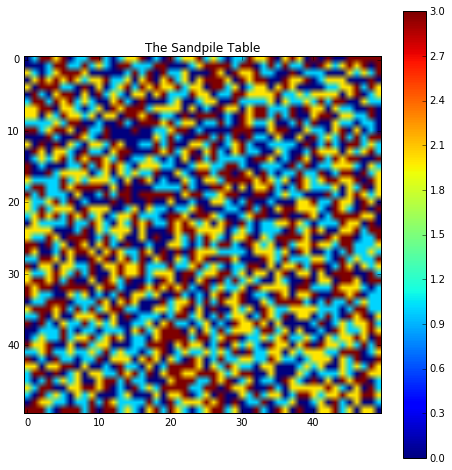

In [4]:
M = initializeMatrix(N)
plt.figure(figsize=(8,8))
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()

### Begin simulation
We then start adding grains of sand, one-by-one, on the sandpile table, choosing a random location every iteration. 

In [5]:
for i in range(iterations):
    topple = 0
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)
    drop(M, x, y, N)
    topplesize.append(topple)

### Plot results

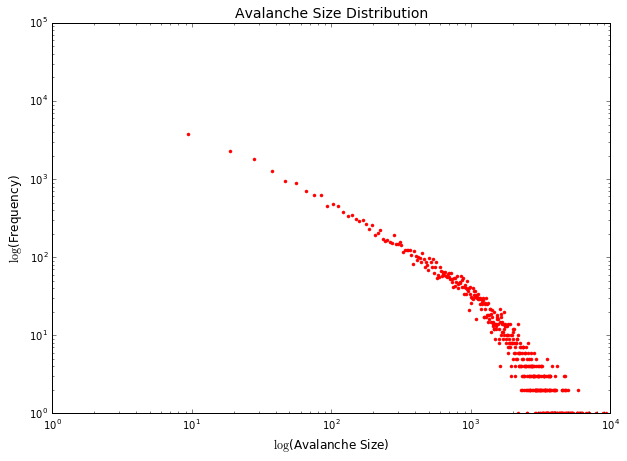

In [6]:
x, y = np.histogram(topplesize, 1000)
plt.figure(figsize=(10,7))
plt.clf()
plt.loglog(y[0:-1],x, 'r.')
plt.title("Avalanche Size Distribution", fontsize=14)
plt.xlabel(r"$\log$" + "(Avalanche Size)", fontsize=12)
plt.ylabel(r"$\log$" + "(Frequency)", fontsize=12)
plt.show()

The final matrix configuration is shown below.

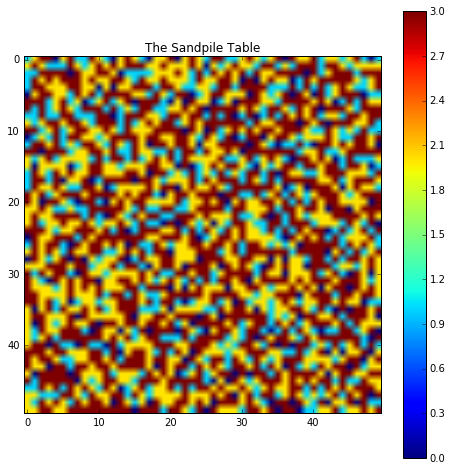

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()

### Power-law
Going back to the avalanche size distribution, let's check if it fits a power-law; and if it does, what is the value of $\alpha$ in $D(s) \sim s^{-\alpha}$? In [1], the reported $\alpha$ was $\sim 0.98$; while in [2], $\alpha \sim 1.1$. To investigate, we use the `powerlaw` [package](https://github.com/jeffalstott/powerlaw) written by Jeff Alstott, Ed Bullmore, and Dietmar Plenz [3]. 

<blockquote>
*powerlaw* is a toolbox using the statistical methods developed in [Clauset et al. 2007](http://arxiv.org/abs/0706.1062) and [Klaus et al. 2011](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0019779) to determine if a probability distribution fits a power law.
</blockquote>

1. P. Bak, C. Tang, and K. Wisenfeld (1987). "Self-Organized Criticality: An Explanation of 1/$f$ Noise," *Physical Review Letters* **59** (4).
2. Bak, Per. How Nature Works: The Science of Self-organized Criticality. New York, NY, USA: Copernicus, 1996. Print.
3. Jeff Alstott, Ed Bullmore, Dietmar Plenz. (2014). powerlaw: a Python package for analysis of heavy-tailed distributions. [PLoS ONE 9(1): e85777](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777)

In [8]:
import powerlaw

In [9]:
def plotDist(topplesize, xmin, xmax):
    x, y = powerlaw.pdf(np.array(topplesize), linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]

    tsize = np.array(topplesize)
    fit = powerlaw.Fit(tsize[tsize>0], discrete=True, xmin=xmin, xmax=xmax)
    alpha = fit.power_law.alpha
    
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(1,1,1)
    #ax1.scatter(x, y, color='r', s=1.2, label="PDF (scatter)")
    powerlaw.plot_pdf(tsize[tsize>0], color='b', ax=ax1, linestyle='-', linewidth=2, label="PDF")
    fit.power_law.plot_pdf(tsize[tsize>0], color='b', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit")
    plt.xlabel(r"Avalanche Size, $s$", fontsize=12)
    plt.ylabel(r"$p(s)$", fontsize=12)
    _ = plt.text(10e1,50e-4,r"$\alpha$="+str(round(alpha,1)), fontsize=13)
    _ = plt.legend(frameon=False)
    
    return

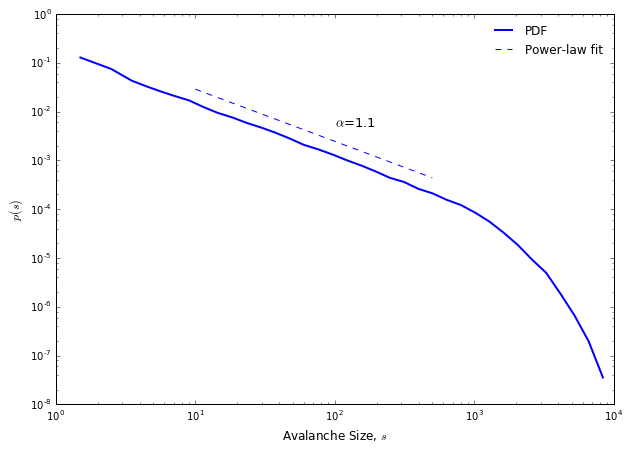

In [10]:
topplesize50 = topplesize
plotDist(topplesize50, xmin=10, xmax=500)

The value $\alpha$ agrees well with the result of Bak, Tang, and Wiesenfeld. The deviation of the fit near the tail is known as finite size effect that is due to the finiteness of the boundaries, limiting the possible observable avalanche sizes. Note that the presence of the power-law indicates scale invariance, pointing to the presence of long-term correlation in the process. A power-law distribution renders the concept of mean (average) trivial.

### Varying grid sizes
Below, we look at how the distributions of cluster sizes vary for different sandpile table sizes (60x60, 100x100, and 150x150). 

In [11]:
def simulate(N):
    global topple
    topplesize = []
    M = initializeMatrix(N)
    for i in range(iterations):
        topple = 0
        x = random.randint(0, N-1)
        y = random.randint(0, N-1)
        drop(M, x, y, N)
        topplesize.append(topple)
    return topplesize

In [12]:
#topplesize50 = simulate(50)
topplesize60 = simulate(60)
topplesize80 = simulate(80)
topplesize100 = simulate(100)
topplesize150 = simulate(150)

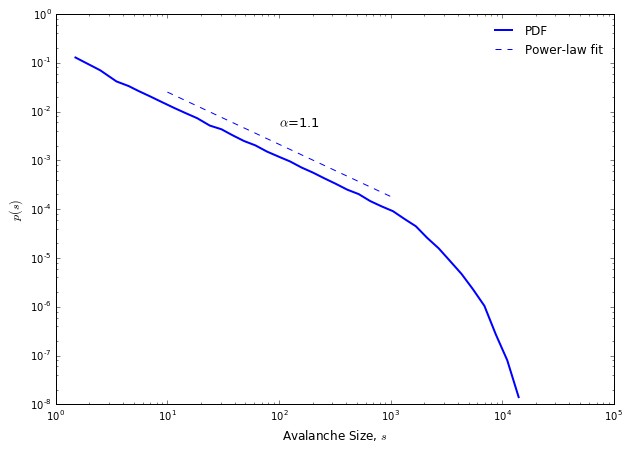

In [13]:
plotDist(topplesize60, xmin=10, xmax=1000)

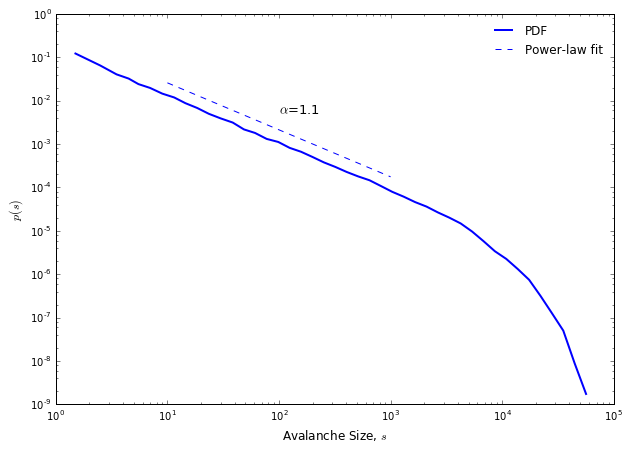

In [14]:
plotDist(topplesize100, xmin=10, xmax=1000)

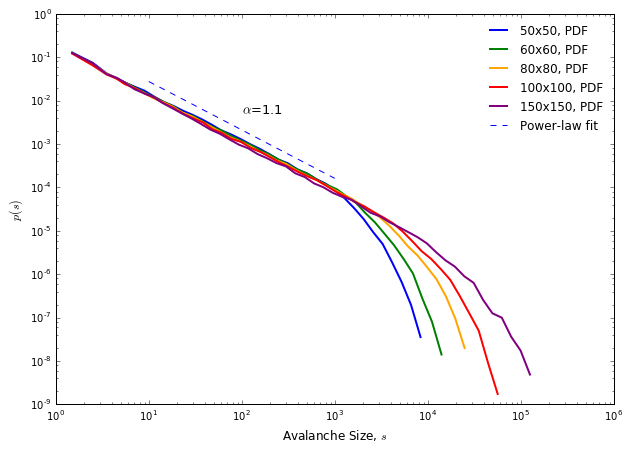

In [15]:
def fitting(topsize, xmin, xmax):
    tsize = np.array(topsize)
    fit = powerlaw.Fit(tsize[tsize>0], discrete=True, xmin=xmin, xmax=xmax)
    alpha = fit.power_law.alpha
    return tsize, fit, alpha

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

tsize, fit, alpha = fitting(topplesize50, 10, 1000)
powerlaw.plot_pdf(tsize[tsize>0], color='b', ax=ax1, linestyle='-', linewidth=2, label="50x50, PDF")

tsize, fit, alpha = fitting(topplesize60, 10, 1000)
powerlaw.plot_pdf(tsize[tsize>0], color='g', ax=ax1, linestyle='-', linewidth=2, label="60x60, PDF")

tsize, fit, alpha = fitting(topplesize80, 10, 1000)
powerlaw.plot_pdf(tsize[tsize>0], color='orange', ax=ax1, linestyle='-', linewidth=2, label="80x80, PDF")

tsize, fit, alpha = fitting(topplesize100, 10, 1000)
powerlaw.plot_pdf(tsize[tsize>0], color='r', ax=ax1, linestyle='-', linewidth=2, label="100x100, PDF")

tsize, fit, alpha = fitting(topplesize150, 10, 1000)
powerlaw.plot_pdf(tsize[tsize>0], color='purple', ax=ax1, linestyle='-', linewidth=2, label="150x150, PDF")

fit.power_law.plot_pdf(tsize[tsize>0], color='b', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit")
_ = plt.text(10e1,50e-4,r"$\alpha$="+str(round(alpha,1)), fontsize=13)
plt.xlabel(r"Avalanche Size, $s$", fontsize=12)
plt.ylabel(r"$p(s)$", fontsize=12)

_ = plt.legend(frameon=False)
